In [45]:
import pandas as pd
import numpy as np
import ast

In [48]:
data = pd.read_csv('tmdb_5000_movies.csv')
data.drop(columns=[ 'id', 'homepage', 'original_language', 
                   'production_companies', 'production_countries', 'spoken_languages',
                   'release_date', 'status', 'title'], inplace = True)
for col in ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']:
    data = data[abs(data[col] - data[col].mean()) < (3 * data[col].std()) ]
    data = data[data[col] > 0]
dictColumns = ['genres', 'keywords']
def transform(l):
    return ' '.join([x['name'] for x in l])
for col in dictColumns:
    data[col] = data[col].apply(ast.literal_eval)
    data[col] = data[col].apply(transform)
# data.fillna('', inplace = True)
data.dropna(inplace=True)
data.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,2.638000e+03,2638.000000,2.638000e+03,2638.000000,2638.000000,2638.000000
mean,3.387017e+07,23.870895,8.374706e+07,108.231615,6.250379,676.743745
std,3.119545e+07,17.340541,8.951353e+07,16.951195,0.798675,685.865538
min,1.000000e+00,0.031947,5.000000e+00,63.000000,3.700000,2.000000
25%,1.000000e+07,10.821187,1.742679e+07,96.000000,5.700000,187.250000
50%,2.500000e+07,19.707021,5.182193e+07,106.000000,6.300000,437.000000
75%,5.000000e+07,32.937446,1.199852e+08,119.000000,6.800000,932.000000
max,1.500000e+08,113.161483,4.630000e+08,171.000000,8.200000,3452.000000


In [42]:
to_data = pd.DataFrame({'budget' : data['budget'],
                       'popularity' : data['popularity'],
                       'revenue': data['revenue'],
                       'runtime' : data['runtime'],
                       'vote_average' : data['vote_average'],
                       'vote_count' : data['vote_count']})

to_data = (to_data - to_data.min()) / (to_data.max() - to_data.min())

text = data[['original_title', 'genres','tagline','keywords','overview']]
for col in ['original_title', 'genres','tagline','keywords','overview']:
    for i in range(len(text)):
        s = text[col].iloc[i]
        spaceCount = 0 
        for j in range(len(s)):
            if s[j] == ' ': 
                spaceCount += 1
            if spaceCount >= 10:
                break
        text[col].iloc[i] = s[:j]


to_data['text'] = '[CLS] ' + text.apply(lambda x: ' [SEP] '.join(x), axis = 1) + ' [SEP]'
to_data.to_csv('myData.csv', index=None)
to_data.describe().to_csv('myData_describe.csv')

D:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [43]:
to_data

,budget,popularity,revenue,runtime,vote_average,vote_count,text
50,1.000000,0.549264,0.723876,0.490741,0.555556,0.671014,[CLS] Prince of Persia: The Sands of Tim [SEP]...
58,0.933333,0.199239,0.557283,0.259259,0.533333,0.226377,[CLS] Rush Hour [SEP] Action Comedy Crime Thr...
71,0.966667,0.530385,0.866369,0.453704,0.333333,0.401449,[CLS] The Mummy: Tomb of the Dragon Empero [SE...
97,0.100000,0.083489,0.166307,0.527778,0.622222,0.040870,[CLS] シン・ゴジ [SEP] Action Adventure Drama Horro...
99,0.253333,0.060798,0.447697,0.398148,0.644444,0.993043,[CLS] The Fast and the Furiou [SEP] Action Cri...
...,...,...,...,...,...,...,...
4773,0.000180,0.174284,0.006806,0.268519,0.822222,0.218261,[CLS] Clerk [SEP] Comed [SEP] Just because the...
4788,0.000080,0.039969,0.012959,0.277778,0.555556,0.031304,[CLS] Pink Flamingo [SEP] Horror Comedy Crim [...
4792,0.000133,0.001595,0.000214,0.444444,0.822222,0.017681,[CLS] キュ [SEP] Crime Horror Mystery Thrille [S...
4796,0.000047,0.205746,0.000917,0.129630,0.711111,0.190145,[CLS] Prime [SEP] Science Fiction Drama Thrill...


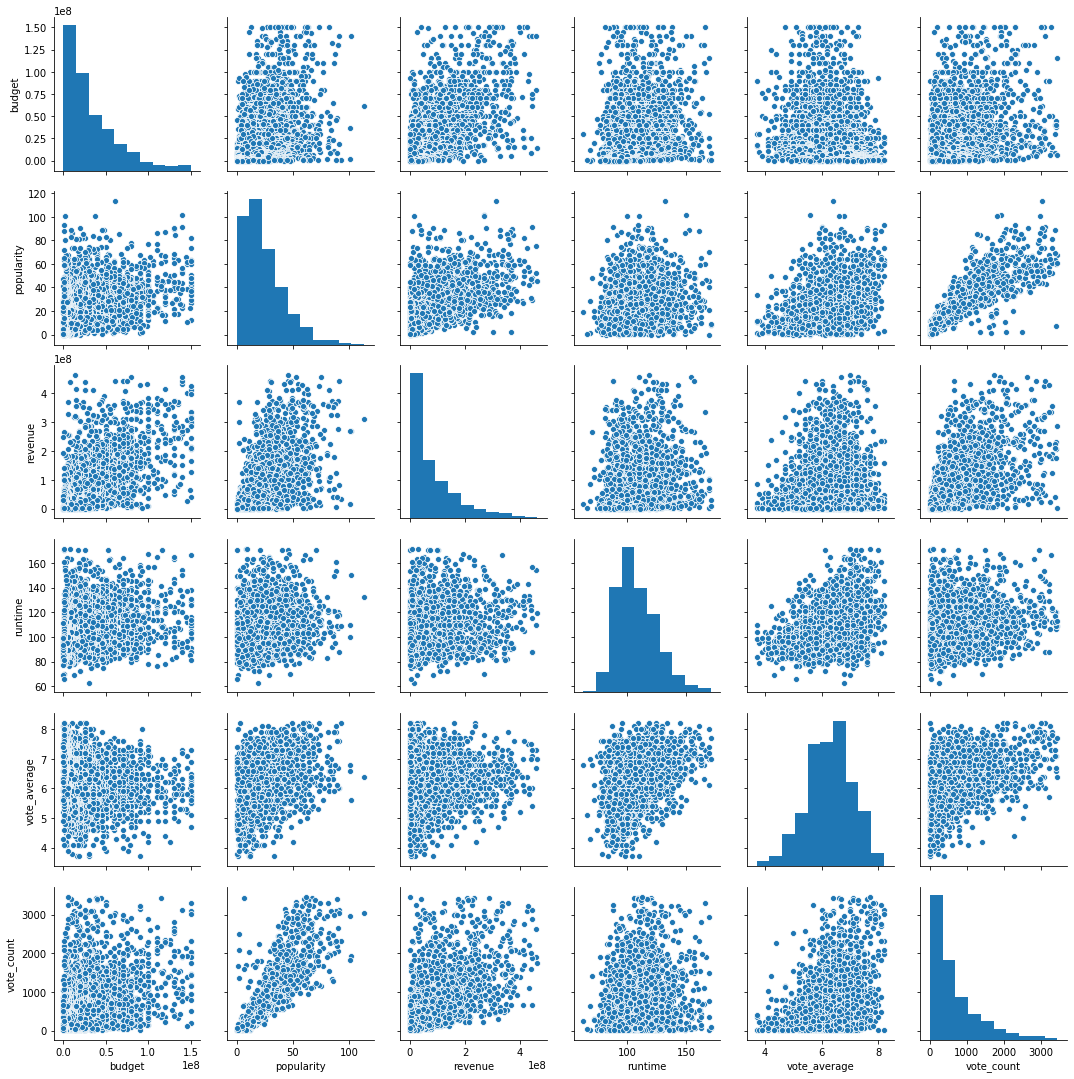

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
numberData = data[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']]
sns.pairplot(numberData)